# PROJECT: NASDAQ 100


- Ozkan Kara 
- Sertan Avdan


- George Brown College
- Postgraduate Program: Applied A.I. Solutions Development
- Course: AASD4011 - Applied Mathematical Concepts for Deep Learning


- Published Date: 2023.02.09

# Project Initiation

### Goal: Predicting the price of the Nasdaq 100 index 55 days later

3 datasets will be used for this project
- Nasdaq 100 (NDX) (2015.01.01 - 2023.01.27) 
- U.S. Consumer Price Index (CPI) YoY (2014.12.17 - 2023.01.27)
- Fed Interest Rate Decision (2014.12.17 - 2023.01.27)

# Project Roadmap
1. Acquire the dataset
    - Source of dataset
    - Brief information about data
2. Explore the data
    - Understand the distribution of the data
3. Prepare the data
    - Remove unnecessary columns or rename columns
    - Merge datasets by date
    - Filling missing values
    - Relationships between different attributes
4. Feature engineering
    - Create new features or modify existing features
    - Adding technic analysis features
    - Visualization of new features
    - Shifting features
5. Split the data
    - Divide the data into train and test sets
6. Develop the model
    - PyTorch Models
7. Conclusion
    - The best model

# 1. Acquire the dataset

## 1.1 Source of dataset

- **Nasdaq 100 (NDX)** (2015.01.01 - 2023.01.27) (https://www.investing.com/indices/nq-100-historical-data)
- **U.S. Consumer Price Index (CPI) YoY** (2014.12.17 - 2023.01.27) (https://www.investing.com/economic-calendar/cpi-733)
- **Fed Interest Rate** (2014.12.17 - 2023.01.27) (https://www.investing.com/economic-calendar/interest-rate-decision-168)

## 1.2 Brief information about data

In [135]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#-------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
#-------------------------------------------------------
import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
#-------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [136]:
torch.cuda.is_available()

True

In [137]:
# device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

### Nasdaq 100 (NDX)

In [138]:
df_NDX = pd.read_csv('Nasdaq 100.csv')
df_NDX

,Date,Price,Open,High,Low,Vol.,Change %
0,2023.01.27,"12,166.60","12,001.32","12,248.15","12,001.32",343.86M,0.96%
1,2023.01.26,"12,051.48","11,974.97","12,053.74","11,854.04",266.40M,2.00%
2,2023.01.25,"11,814.69","11,636.01","11,841.81","11,550.46",254.58M,-0.27%
3,2023.01.24,"11,846.64","11,804.13","11,889.37","11,780.25",213.95M,-0.22%
4,2023.01.23,"11,872.54","11,653.69","11,918.84","11,619.14",289.33M,2.18%
...,...,...,...,...,...,...,...
2027,2015.01.08,"4,240.55","4,195.49","4,247.93","4,192.63",201.71M,1.94%
2028,2015.01.07,"4,160.00","4,139.85","4,169.97","4,126.39",178.56M,1.20%
2029,2015.01.06,"4,110.83","4,174.78","4,176.26","4,090.33",195.67M,-1.20%
2030,2015.01.05,"4,160.96","4,206.55","4,210.96","4,151.85",191.88M,-1.64%


Nasdaq 100 (NDX) (2015.01.01 - 2023.01.27)

> The Nasdaq-100 is a stock market index made up of 101 equity securities issued by 100 of the largest non-financial companies listed on the Nasdaq stock exchange. It is a modified capitalization-weighted index. (Wikipedia)

- Date (YYYY.MM.DD)
- Price: Last price during a trading session
- Open: Open price for a trading session
- High: Highest price during trading session
- Low: Lowest price during trading session
- Vol: Trading volume
- Change%: Daily Change

### U.S. Consumer Price Index (CPI) YoY

In [139]:
df_CPI = pd.read_csv('US CPI.csv')
df_CPI

,Release Date,Time,Actual,Forecast,Previous
0,2023.01.12,08:30,6.50%,6.50%,7.10%
1,2022.12.13,08:30,7.10%,7.30%,7.70%
2,2022.11.10,08:30,7.70%,8.00%,8.20%
3,2022.10.13,07:30,8.20%,8.10%,8.30%
4,2022.09.13,07:30,8.30%,8.10%,8.50%
...,...,...,...,...,...
93,2015.04.17,07:30,-0.10%,0.10%,0.00%
94,2015.03.24,07:30,0.00%,-0.10%,-0.10%
95,2015.02.26,08:30,-0.10%,-0.10%,0.80%
96,2015.01.16,08:30,0.80%,0.70%,1.30%


U.S. Consumer Price Index (CPI) YoY (2014.12.17 - 2023.01.27)

> The CPI is one of the most popular measures of inflation and deflation.
The Consumer Price Index measures the overall change in consumer prices based on a representative basket of goods and services over time.The CPI is the most widely used measure of inflation, closely followed by policymakers, financial markets, businesses, and consumers. (Investopedia)

- Release Date: CPI data published date
- Time: CPI data published time
- Actual: Actual is what the actual reported value for this time is
- Forecast: Forecast is what the analysts/economists think the value will be this time
- Previous: Previous is the value of the data the last time it was released

### Fed Interest Rate

In [140]:
df_RATE = pd.read_csv('US Interest Rate.csv')
df_RATE

,Release Date,Time,Actual,Forecast,Previous
0,2022.12.14,14:00,4.50%,4.50%,4.00%
1,2022.11.02,13:00,4.00%,4.00%,3.25%
2,2022.09.21,13:00,3.25%,3.25%,2.50%
3,2022.07.27,13:00,2.50%,2.50%,1.75%
4,2022.06.15,13:00,1.75%,1.50%,1.00%
...,...,...,...,...,...
61,2015.06.17,13:00,0.25%,0.25%,0.25%
62,2015.04.29,13:00,0.25%,0.25%,0.25%
63,2015.03.18,13:00,0.25%,0.25%,0.25%
64,2015.01.28,14:00,0.25%,0.25%,0.25%


Fed Interest Rate (2014.12.17 - 2023.01.27)

> An interest rate set by the Federal Reserve to indirectly manage interest rates, inflation and unemployment. The term federal funds rate refers to the target interest rate set by the Federal Open Market Committee (FOMC). This target is the rate at which commercial banks borrow and lend their excess reserves to each other overnight. The FOMC, which is the policymaking body of the Federal Reserve System, meets eight times a year to set the target federal funds rate, which is part of its monetary policy. This is used to help promote economic growth.(Investopedia)

- Release Date: U.S. Interest Rate published date
- Time: U.S. Interest Rate published time
- Actual: Actual is what the actual reported value for this time is
- Forecast: Forecast is what the analysts/economists think the value will be this time
- Previous: Previous is the value of the data the last time it was released

# 2. Explore the data

## 2.1 Understand the distribution of the data

In [141]:
# Price str to float
df_NDX['Price'] = df_NDX['Price'].str.replace(',', '')
df_NDX['Price'] = pd.to_numeric(df_NDX['Price'])

# Volume (million)
df_NDX['Vol.'] = df_NDX['Vol.'].apply(lambda x: float(x.strip('M')))
df_NDX

,Date,Price,Open,High,Low,Vol.,Change %
0,2023.01.27,12166.60,"12,001.32","12,248.15","12,001.32",343.86,0.96%
1,2023.01.26,12051.48,"11,974.97","12,053.74","11,854.04",266.40,2.00%
2,2023.01.25,11814.69,"11,636.01","11,841.81","11,550.46",254.58,-0.27%
3,2023.01.24,11846.64,"11,804.13","11,889.37","11,780.25",213.95,-0.22%
4,2023.01.23,11872.54,"11,653.69","11,918.84","11,619.14",289.33,2.18%
...,...,...,...,...,...,...,...
2027,2015.01.08,4240.55,"4,195.49","4,247.93","4,192.63",201.71,1.94%
2028,2015.01.07,4160.00,"4,139.85","4,169.97","4,126.39",178.56,1.20%
2029,2015.01.06,4110.83,"4,174.78","4,176.26","4,090.33",195.67,-1.20%
2030,2015.01.05,4160.96,"4,206.55","4,210.96","4,151.85",191.88,-1.64%


In [142]:
df_NDX[['Price']].describe()

,Price
count,2032.000000
mean,8391.499882
std,3628.905833
min,3947.800000
25%,5020.445000
50%,7318.715000
75%,11619.805000
max,16573.340000


In [143]:
# CPI (%)
df_CPI['Actual'] = df_CPI['Actual'].apply(lambda x: float(str(x).strip('%')))
df_CPI

,Release Date,Time,Actual,Forecast,Previous
0,2023.01.12,08:30,6.5,6.50%,7.10%
1,2022.12.13,08:30,7.1,7.30%,7.70%
2,2022.11.10,08:30,7.7,8.00%,8.20%
3,2022.10.13,07:30,8.2,8.10%,8.30%
4,2022.09.13,07:30,8.3,8.10%,8.50%
...,...,...,...,...,...
93,2015.04.17,07:30,-0.1,0.10%,0.00%
94,2015.03.24,07:30,0.0,-0.10%,-0.10%
95,2015.02.26,08:30,-0.1,-0.10%,0.80%
96,2015.01.16,08:30,0.8,0.70%,1.30%


In [144]:
df_CPI[['Actual']].describe()

,Actual
count,98.000000
mean,2.681633
std,2.470208
min,-0.200000
25%,1.200000
50%,1.900000
75%,2.700000
max,9.100000


In [145]:
# RATE (%)
df_RATE['Actual'] = df_RATE['Actual'].apply(lambda x: float(str(x).strip('%')))
df_RATE

,Release Date,Time,Actual,Forecast,Previous
0,2022.12.14,14:00,4.50,4.50%,4.00%
1,2022.11.02,13:00,4.00,4.00%,3.25%
2,2022.09.21,13:00,3.25,3.25%,2.50%
3,2022.07.27,13:00,2.50,2.50%,1.75%
4,2022.06.15,13:00,1.75,1.50%,1.00%
...,...,...,...,...,...
61,2015.06.17,13:00,0.25,0.25%,0.25%
62,2015.04.29,13:00,0.25,0.25%,0.25%
63,2015.03.18,13:00,0.25,0.25%,0.25%
64,2015.01.28,14:00,0.25,0.25%,0.25%


In [146]:
df_RATE[['Actual']].describe()

,Actual
count,66.00000
mean,1.12500
std,1.01171
min,0.25000
25%,0.25000
50%,0.62500
75%,1.75000
max,4.50000


# 3. Prepare the data

## 3.1 Remove unnecessary columns or rename columns

In [147]:
df_NDX = df_NDX.rename(columns={'Date':'DATE','Price':'PRICE','Vol.': 'VOLUME'})
df_NDX.drop(['Open','High','Low','Change %'], axis = 1, inplace = True)
df_NDX

,DATE,PRICE,VOLUME
0,2023.01.27,12166.60,343.86
1,2023.01.26,12051.48,266.40
2,2023.01.25,11814.69,254.58
3,2023.01.24,11846.64,213.95
4,2023.01.23,11872.54,289.33
...,...,...,...
2027,2015.01.08,4240.55,201.71
2028,2015.01.07,4160.00,178.56
2029,2015.01.06,4110.83,195.67
2030,2015.01.05,4160.96,191.88


In [148]:
df_CPI = df_CPI.rename(columns={'Release Date': 'DATE','Actual': 'CPI'})
df_CPI.drop(['Time','Forecast','Previous'], axis = 1, inplace = True)
df_CPI

,DATE,CPI
0,2023.01.12,6.5
1,2022.12.13,7.1
2,2022.11.10,7.7
3,2022.10.13,8.2
4,2022.09.13,8.3
...,...,...
93,2015.04.17,-0.1
94,2015.03.24,0.0
95,2015.02.26,-0.1
96,2015.01.16,0.8


In [149]:
df_RATE = df_RATE.rename(columns={'Release Date': 'DATE','Actual': 'RATE'})
df_RATE.drop(['Time','Forecast','Previous'], axis = 1, inplace = True)
df_RATE

,DATE,RATE
0,2022.12.14,4.50
1,2022.11.02,4.00
2,2022.09.21,3.25
3,2022.07.27,2.50
4,2022.06.15,1.75
...,...,...
61,2015.06.17,0.25
62,2015.04.29,0.25
63,2015.03.18,0.25
64,2015.01.28,0.25


## 3.2 Merge datasets by date

In [150]:
merged_df = df_NDX.merge(df_CPI, on='DATE', how='outer').merge(df_RATE, on='DATE', how='outer')
merged_df.head(20)

,DATE,PRICE,VOLUME,CPI,RATE
0,2023.01.27,12166.60,343.86,NaN,NaN
1,2023.01.26,12051.48,266.40,NaN,NaN
2,2023.01.25,11814.69,254.58,NaN,NaN
3,2023.01.24,11846.64,213.95,NaN,NaN
4,2023.01.23,11872.54,289.33,NaN,NaN
5,2023.01.20,11619.03,343.34,NaN,NaN
6,2023.01.19,11295.67,258.59,NaN,NaN
7,2023.01.18,11410.29,270.21,NaN,NaN
8,2023.01.17,11557.19,261.63,NaN,NaN
9,2023.01.13,11541.48,229.09,NaN,NaN


In [151]:
sorted_df = merged_df.sort_values('DATE')
sorted_df.head(20)

,DATE,PRICE,VOLUME,CPI,RATE
2034,2014.12.17,NaN,NaN,1.3,0.25
2031,2015.01.02,4230.24,133.32,NaN,NaN
2030,2015.01.05,4160.96,191.88,NaN,NaN
2029,2015.01.06,4110.83,195.67,NaN,NaN
2028,2015.01.07,4160.00,178.56,NaN,NaN
2027,2015.01.08,4240.55,201.71,NaN,NaN
2026,2015.01.09,4213.28,159.52,NaN,NaN
2025,2015.01.12,4169.97,175.80,NaN,NaN
2024,2015.01.13,4166.20,211.74,NaN,NaN
2023,2015.01.14,4145.84,203.67,NaN,NaN


In [152]:
sorted_df.tail(20)

,DATE,PRICE,VOLUME,CPI,RATE
19,2022.12.29,10951.05,229.51,NaN,NaN
18,2022.12.30,10939.76,224.00,NaN,NaN
17,2023.01.03,10862.64,293.99,NaN,NaN
16,2023.01.04,10914.80,291.71,NaN,NaN
15,2023.01.05,10741.22,279.74,NaN,NaN
14,2023.01.06,11040.35,315.22,NaN,NaN
13,2023.01.09,11108.45,273.87,NaN,NaN
12,2023.01.10,11205.78,231.44,NaN,NaN
11,2023.01.11,11402.53,278.73,NaN,NaN
10,2023.01.12,11459.61,264.80,6.5,NaN


## 3.3 Filling missing values

We ensured data continuity by filling in the blanks with the previous data.

In [153]:
sorted_df['CPI'].fillna(method='ffill', inplace=True)
sorted_df['RATE'].fillna(method='ffill', inplace=True)
sorted_df['PRICE'].fillna(method='ffill', inplace=True)
sorted_df['VOLUME'].fillna(method='ffill', inplace=True)

In [154]:
sorted_df.head(20)

,DATE,PRICE,VOLUME,CPI,RATE
2034,2014.12.17,NaN,NaN,1.3,0.25
2031,2015.01.02,4230.24,133.32,1.3,0.25
2030,2015.01.05,4160.96,191.88,1.3,0.25
2029,2015.01.06,4110.83,195.67,1.3,0.25
2028,2015.01.07,4160.00,178.56,1.3,0.25
2027,2015.01.08,4240.55,201.71,1.3,0.25
2026,2015.01.09,4213.28,159.52,1.3,0.25
2025,2015.01.12,4169.97,175.80,1.3,0.25
2024,2015.01.13,4166.20,211.74,1.3,0.25
2023,2015.01.14,4145.84,203.67,1.3,0.25


In [155]:
sorted_df.tail(20)

,DATE,PRICE,VOLUME,CPI,RATE
19,2022.12.29,10951.05,229.51,7.1,4.5
18,2022.12.30,10939.76,224.00,7.1,4.5
17,2023.01.03,10862.64,293.99,7.1,4.5
16,2023.01.04,10914.80,291.71,7.1,4.5
15,2023.01.05,10741.22,279.74,7.1,4.5
14,2023.01.06,11040.35,315.22,7.1,4.5
13,2023.01.09,11108.45,273.87,7.1,4.5
12,2023.01.10,11205.78,231.44,7.1,4.5
11,2023.01.11,11402.53,278.73,7.1,4.5
10,2023.01.12,11459.61,264.80,6.5,4.5


In [156]:
df = sorted_df[1:]
df = df.reset_index(drop=True)

In [157]:
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y.%m.%d')

## 3.4 Relationships between different attributes

In [158]:
corr = sorted_df.corr()
corr

,PRICE,VOLUME,CPI,RATE
PRICE,1.000000,0.279117,0.695201,-0.016275
VOLUME,0.279117,1.000000,0.340957,0.146846
CPI,0.695201,0.340957,1.000000,0.349302
RATE,-0.016275,0.146846,0.349302,1.000000


<AxesSubplot:>

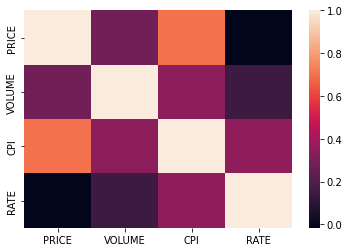

In [159]:
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

# 4. Feature engineering

## 4.1 Create new features or modify existing features

We have devised a new feature to assess the impact of the disparity between the Consumer Price Index and the Federal Reserve's interest rate on the Nasdaq index

In [160]:
df['DIFF_CPI_RATE'] = df['CPI']-df['RATE']

In [161]:
df.head(60)

,DATE,PRICE,VOLUME,CPI,RATE,DIFF_CPI_RATE
0,2015-01-02,4230.24,133.32,1.3,0.25,1.05
1,2015-01-05,4160.96,191.88,1.3,0.25,1.05
2,2015-01-06,4110.83,195.67,1.3,0.25,1.05
3,2015-01-07,4160.00,178.56,1.3,0.25,1.05
4,2015-01-08,4240.55,201.71,1.3,0.25,1.05
5,2015-01-09,4213.28,159.52,1.3,0.25,1.05
6,2015-01-12,4169.97,175.80,1.3,0.25,1.05
7,2015-01-13,4166.20,211.74,1.3,0.25,1.05
8,2015-01-14,4145.84,203.67,1.3,0.25,1.05
9,2015-01-15,4089.65,193.25,1.3,0.25,1.05


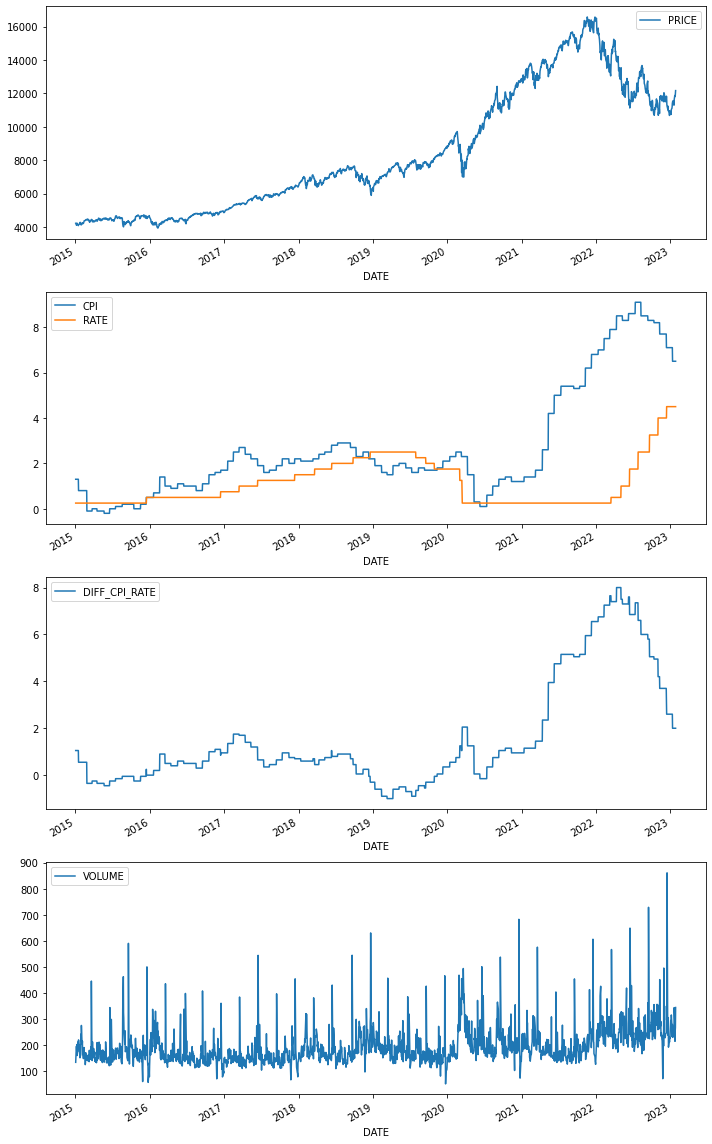

In [162]:
fig, ax = plt.subplots(4, 1, figsize=(10, 16))

df.plot(x='DATE', y='PRICE', ax=ax[0], kind='line')
df.plot(x='DATE', y=['CPI', 'RATE'], ax=ax[1], kind='line')
df.plot(x='DATE', y=['DIFF_CPI_RATE'], ax=ax[2], kind='line')
df.plot(x='DATE', y=['VOLUME'], ax=ax[3], kind='line')

plt.tight_layout()
plt.show()

## 4.2 Adding technic analysis features

### 4.2.1 Four Moments

The four moments in mathematics are statistical measures used to describe the shape and distribution of a set of data. They are:

**Mean or average (μ):** It is the sum of all the values in a set of data divided by the number of values. It gives an idea of the central tendency of the data.

**Standard deviation (σ):** It is a measure of how much the data deviates from the mean. A low standard deviation indicates that the data points tend to be close to the mean, while a high standard deviation indicates that the data points are spread out.

**Skewness (S):** It is a measure of the asymmetry of the distribution. A positive skewness means the data is skewed to the right, while a negative skewness means the data is skewed to the left.

**Kurtosis (K):** It is a measure of the peakedness of the distribution. A high kurtosis indicates a sharp peak, while a low kurtosis indicates a flat peak.

Together, these four moments can provide a comprehensive picture of the shape and distribution of a set of data. **(ChatGPT)**


### 4.2.2 STO and ROC

Stochastic Indicator and Rate of Change (ROC) are technical analysis tools used to evaluate securities and market trends.

**Stochastic Indicator:** The Stochastic Indicator is a momentum oscillator that measures the level of the closing price of a security relative to its price range over a specific period of time. It helps to identify potential overbought and oversold conditions and potential trend reversals. The Stochastic Indicator is displayed as two lines: %K and %D.

**Rate of Change (ROC):** The Rate of Change (ROC) is a momentum indicator that measures the percentage change between the current price and a past price. It is used to determine whether the security is gaining or losing momentum and to identify potential trend reversals. The ROC is calculated as the current price minus the price n periods ago divided by the price n periods ago.

These tools are used in conjunction with other technical analysis indicators and charts to provide a comprehensive picture of the current market conditions and to help make informed trading decisions. However, it's important to remember that technical analysis should not be the sole decision-making tool, and other factors such as fundamental analysis and risk management should also be considered. **(ChatGPT)**

*inspried by* https://www.kaggle.com/code/michaelsammons/paypal-stock-analysis

In [163]:
def Technical_Analysis(df,window):
    
    df['MA_'+str(window)] = df['PRICE'].rolling(window).mean()
    df['STD_'+str(window)] = df['PRICE'].rolling(window).std()
    df['SKEW_'+str(window)] = df['PRICE'].rolling(window).skew()
    df['KURT_'+str(window)] = df['PRICE'].rolling(window).kurt()
    df['MAX_'+str(window)] = df['PRICE'].rolling(window).max()
    df['MIN_'+str(window)] = df['PRICE'].rolling(window).min()
    
    df['DIFF_MA_'+str(window)] = df['PRICE']-df['MA_'+str(window)]
    df['ZSCORE_'+str(window)] = (df['PRICE']-df['MA_'+str(window)])/df['STD_'+str(window)]
    df['STO_'+str(window)] = (df['PRICE']-df['MIN_'+str(window)])/(df['MAX_'+str(window)]-df['MIN_'+str(window)])
    df['ROC_'+str(window)] = df['PRICE'].pct_change(periods=window)

We have introduced new features that incorporates the results of technical analysis and the connections between them over 20 and 50-day periods.

In [164]:
Technical_Analysis(df,20)
Technical_Analysis(df,50)
df

,DATE,PRICE,VOLUME,CPI,RATE,DIFF_CPI_RATE,MA_20,STD_20,SKEW_20,KURT_20,...,MA_50,STD_50,SKEW_50,KURT_50,MAX_50,MIN_50,DIFF_MA_50,ZSCORE_50,STO_50,ROC_50
0,2015-01-02,4230.24,133.32,1.3,0.25,1.05,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-05,4160.96,191.88,1.3,0.25,1.05,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-01-06,4110.83,195.67,1.3,0.25,1.05,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-01-07,4160.00,178.56,1.3,0.25,1.05,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-01-08,4240.55,201.71,1.3,0.25,1.05,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2030,2023-01-23,11872.54,289.33,6.5,4.50,2.00,11168.2915,332.620379,0.451919,-0.769005,...,11430.8708,373.790214,-0.383130,-0.965350,12041.89,10679.34,441.6692,1.181596,0.875711,0.073515
2031,2023-01-24,11846.64,213.95,6.5,4.50,2.00,11212.8165,361.108595,0.339499,-0.986483,...,11451.8526,366.895249,-0.443772,-0.871930,12041.89,10679.34,394.7874,1.076022,0.856703,0.097160
2032,2023-01-25,11814.69,254.58,6.5,4.50,2.00,11254.2785,380.703170,0.168725,-1.219422,...,11456.0272,369.860001,-0.449927,-0.903608,12041.89,10679.34,358.6628,0.969726,0.833254,0.017985
2033,2023-01-26,12051.48,266.40,6.5,4.50,2.00,11315.7270,405.706077,0.144654,-1.054199,...,11460.7166,375.966252,-0.401700,-0.902513,12051.48,10679.34,590.7634,1.571320,1.000000,0.019842


In [165]:
df['DIFF_MA_20_50'] = (df['MA_20']-df['MA_50'])/df['MA_50']
df['DIFF_STD_20_50'] = (df['STD_20']-df['STD_50'])/df['STD_50']
df['DIFF_SKEW_20_50'] = df['SKEW_20']-df['SKEW_50']
df['DIFF_KURT_20_50'] = df['KURT_20']-df['KURT_50']
df['DIFF_MAX_20_50'] = (df['MAX_20']-df['MAX_50'])/df['MAX_50']
df['DIFF_MIN_20_50'] = (df['MIN_20']-df['MIN_50'])/df['MIN_50']
df['DIFF_ZSCORE_20_50'] = df['ZSCORE_20']-df['ZSCORE_50']
df['DIFF_STO_20_50'] = df['STO_20']-df['STO_50']
df['DIFF_ROC_20_50'] = df['ROC_20']-df['ROC_50']
df

,DATE,PRICE,VOLUME,CPI,RATE,DIFF_CPI_RATE,MA_20,STD_20,SKEW_20,KURT_20,...,ROC_50,DIFF_MA_20_50,DIFF_STD_20_50,DIFF_SKEW_20_50,DIFF_KURT_20_50,DIFF_MAX_20_50,DIFF_MIN_20_50,DIFF_ZSCORE_20_50,DIFF_STO_20_50,DIFF_ROC_20_50
0,2015-01-02,4230.24,133.32,1.3,0.25,1.05,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-05,4160.96,191.88,1.3,0.25,1.05,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-01-06,4110.83,195.67,1.3,0.25,1.05,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-01-07,4160.00,178.56,1.3,0.25,1.05,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-01-08,4240.55,201.71,1.3,0.25,1.05,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2030,2023-01-23,11872.54,289.33,6.5,4.50,2.00,11168.2915,332.620379,0.451919,-0.769005,...,0.073515,-0.022971,-0.110142,0.835049,0.196346,-0.014063,0.000000,0.935678,0.124289,-0.016852
2031,2023-01-24,11846.64,213.95,6.5,4.50,2.00,11212.8165,361.108595,0.339499,-0.986483,...,0.097160,-0.020873,-0.015772,0.783272,-0.114553,-0.014063,0.000000,0.679194,0.121591,-0.015881
2032,2023-01-25,11814.69,254.58,6.5,4.50,2.00,11254.2785,380.703170,0.168725,-1.219422,...,0.017985,-0.017611,0.029317,0.618651,-0.315813,-0.014063,0.000000,0.502317,0.118263,0.057501
2033,2023-01-26,12051.48,266.40,6.5,4.50,2.00,11315.7270,405.706077,0.144654,-1.054199,...,0.019842,-0.012651,0.079102,0.546353,-0.151685,0.000000,0.000000,0.242192,0.000000,0.093715


## 4.3 Visualization of new features

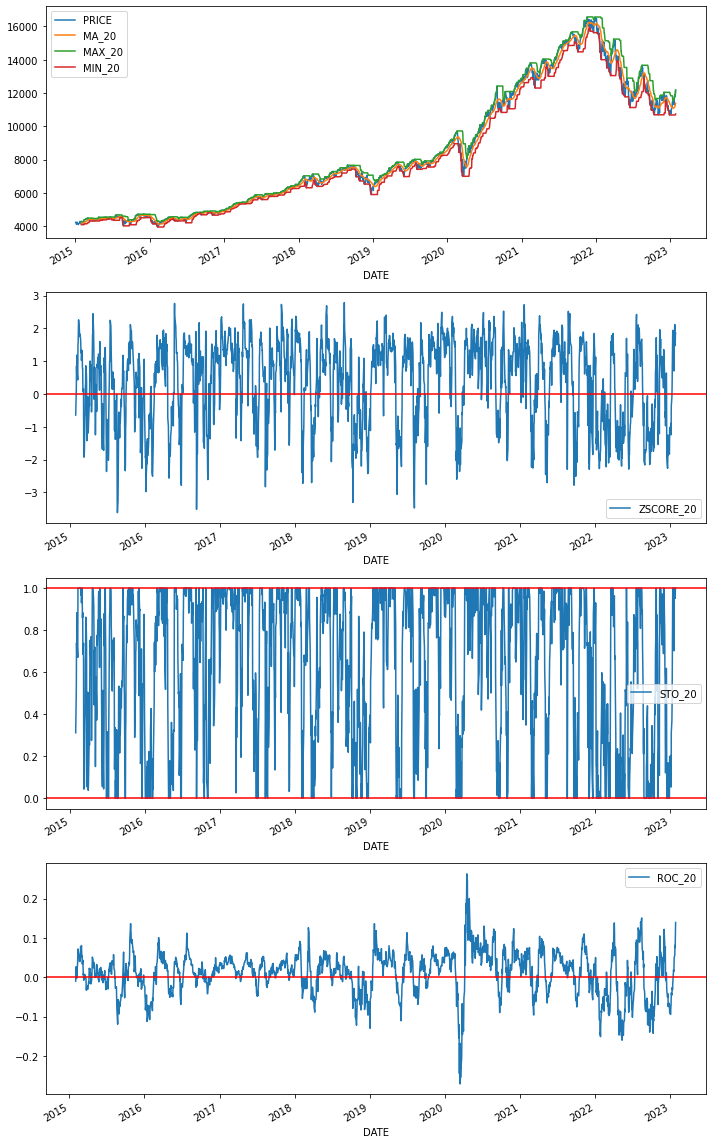

In [166]:
fig, ax = plt.subplots(4, 1, figsize=(10, 16))

df.plot(x='DATE', y=['PRICE','MA_20','MAX_20','MIN_20'], ax=ax[0], kind='line')
plt1 = df.plot(x='DATE', y=['ZSCORE_20'], ax=ax[1], kind='line')
plt1.axhline(y = 0, color = 'r', linestyle = '-')
plt2 = df.plot(x='DATE', y=['STO_20'], ax=ax[2], kind='line')
plt2.axhline(y = 1, color = 'r', linestyle = '-')
plt2.axhline(y = 0, color = 'r', linestyle = '-')
plt3= df.plot(x='DATE', y=['ROC_20'], ax=ax[3], kind='line')
plt3.axhline(y = 0, color = 'r', linestyle = '-')

plt.tight_layout()
plt.show()

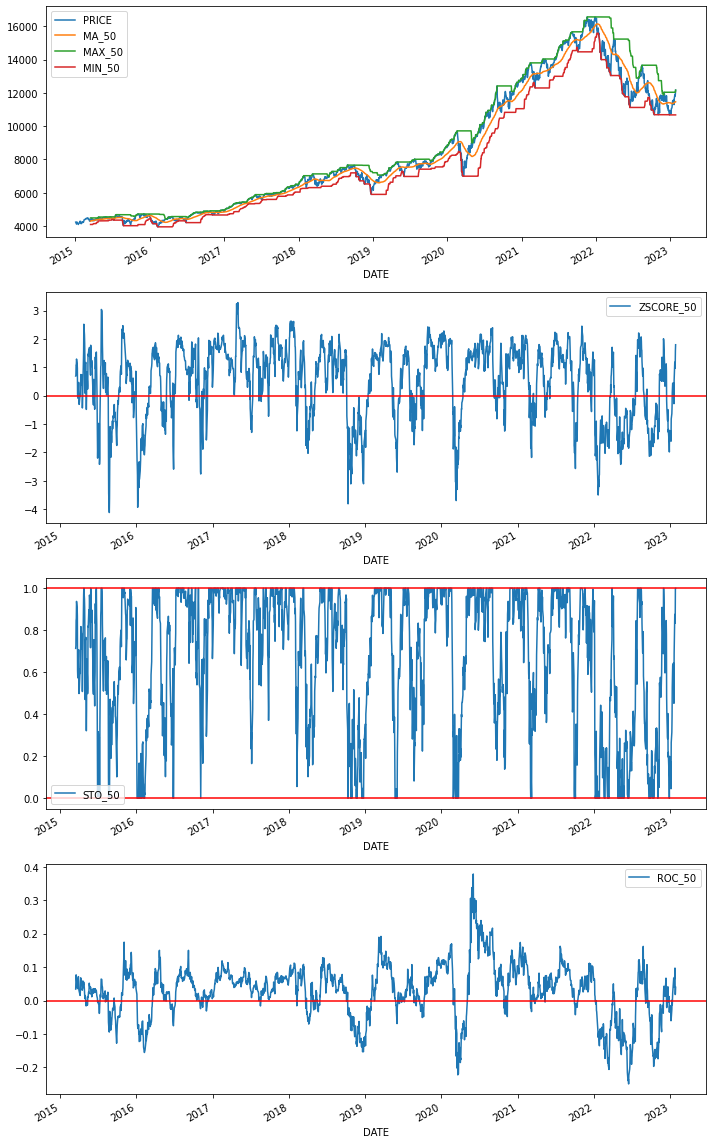

In [167]:
fig, ax = plt.subplots(4, 1, figsize=(10, 16))

df.plot(x='DATE', y=['PRICE','MA_50','MAX_50','MIN_50'], ax=ax[0], kind='line')
plt1 = df.plot(x='DATE', y=['ZSCORE_50'], ax=ax[1], kind='line')
plt1.axhline(y = 0, color = 'r', linestyle = '-')
plt2 = df.plot(x='DATE', y=['STO_50'], ax=ax[2], kind='line')
plt2.axhline(y = 1, color = 'r', linestyle = '-')
plt2.axhline(y = 0, color = 'r', linestyle = '-')
plt3= df.plot(x='DATE', y=['ROC_50'], ax=ax[3], kind='line')
plt3.axhline(y = 0, color = 'r', linestyle = '-')

plt.tight_layout()
plt.show()

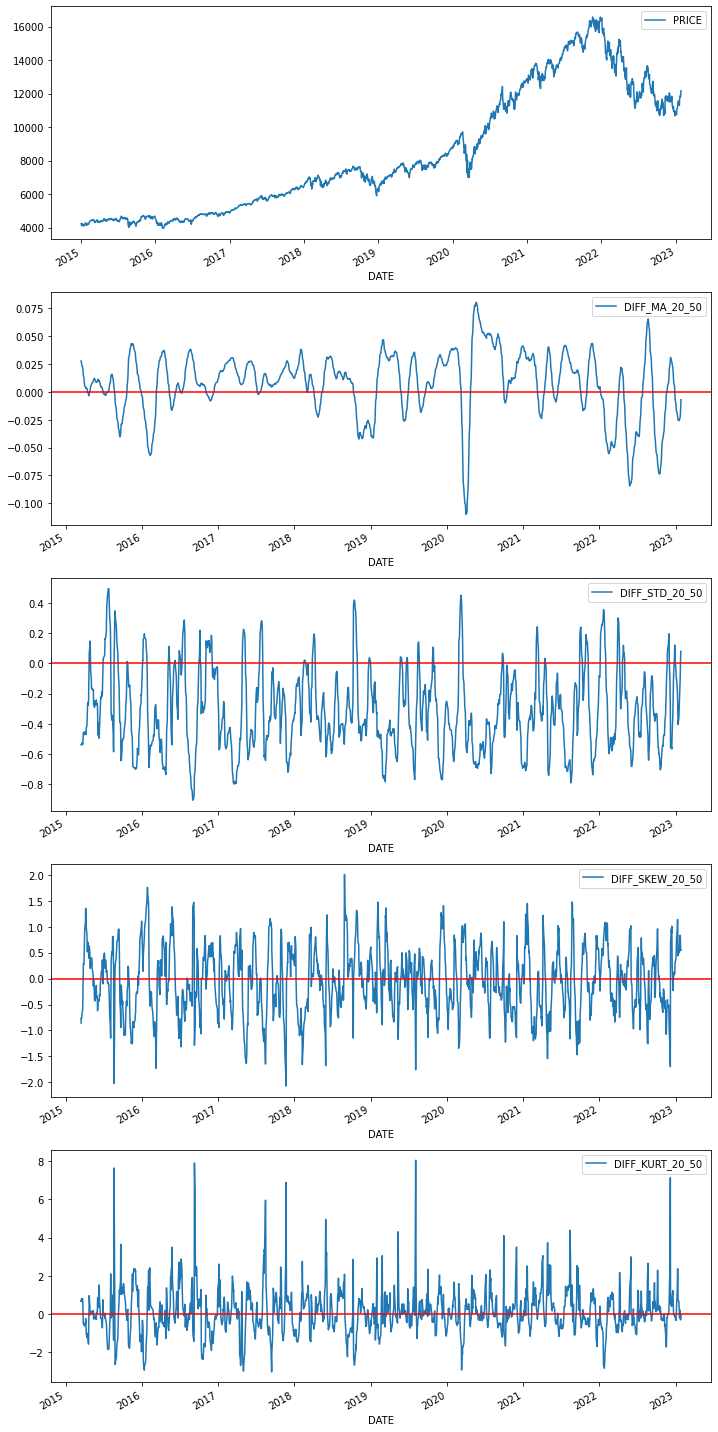

In [168]:
fig, ax = plt.subplots(5, 1, figsize=(10, 20))

df.plot(x='DATE', y=['PRICE'], ax=ax[0], kind='line')
plt1 = df.plot(x='DATE', y=['DIFF_MA_20_50'], ax=ax[1], kind='line')
plt1.axhline(y = 0, color = 'r', linestyle = '-')
plt2 = df.plot(x='DATE', y=['DIFF_STD_20_50'], ax=ax[2], kind='line')
plt2.axhline(y = 0, color = 'r', linestyle = '-')
plt3= df.plot(x='DATE', y=['DIFF_SKEW_20_50'], ax=ax[3], kind='line')
plt3.axhline(y = 0, color = 'r', linestyle = '-')
plt4= df.plot(x='DATE', y=['DIFF_KURT_20_50'], ax=ax[4], kind='line')
plt4.axhline(y = 0, color = 'r', linestyle = '-')

plt.tight_layout()
plt.show()

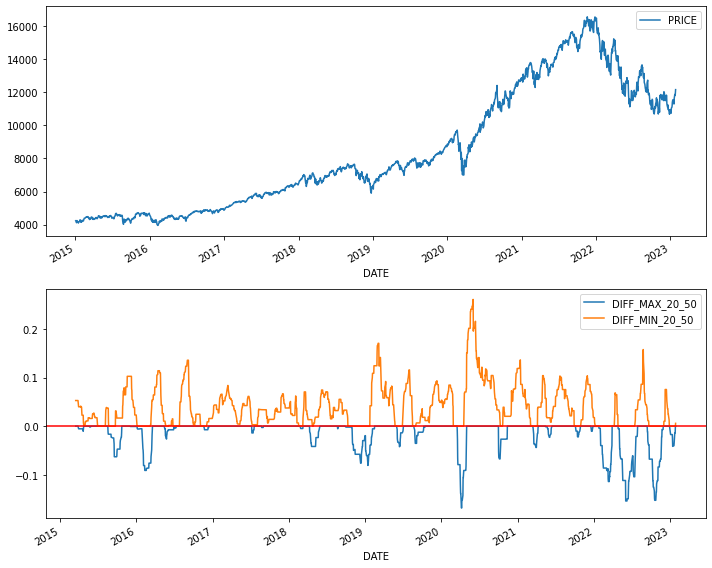

In [169]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

df.plot(x='DATE', y=['PRICE'], ax=ax[0], kind='line')
plt1 = df.plot(x='DATE', y=['DIFF_MAX_20_50','DIFF_MIN_20_50'], ax=ax[1], kind='line')
plt1.axhline(y = 0, color = 'r', linestyle = '-')

plt.tight_layout()
plt.show()

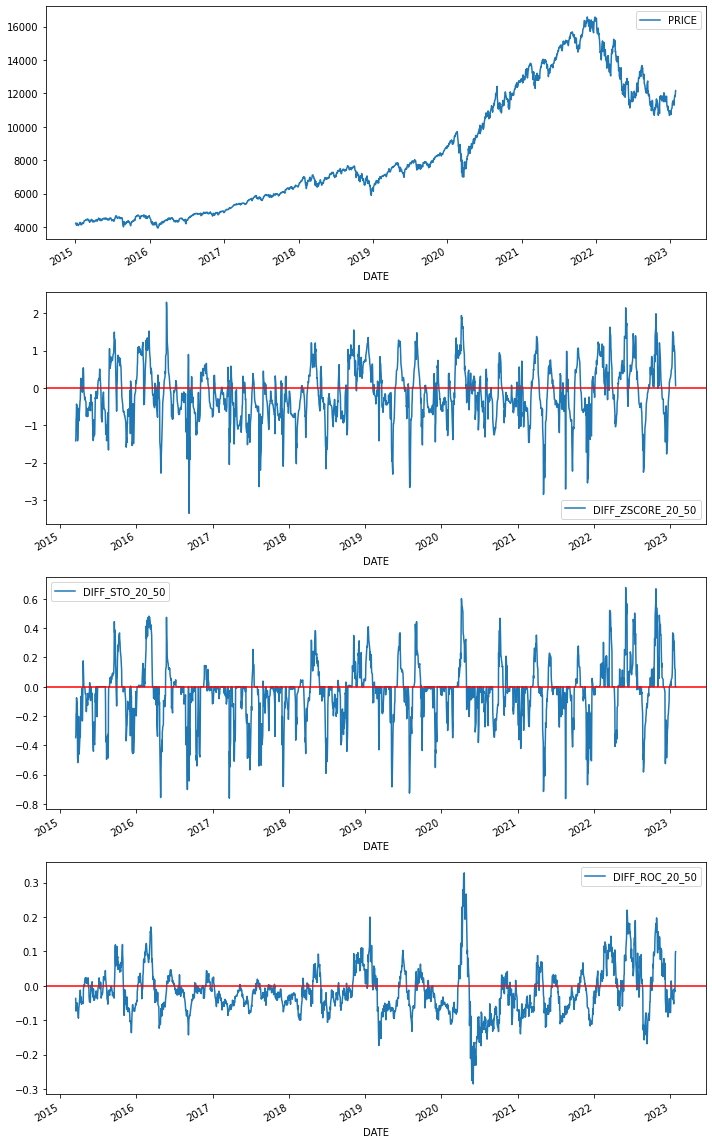

In [170]:
fig, ax = plt.subplots(4, 1, figsize=(10, 16))

df.plot(x='DATE', y=['PRICE'], ax=ax[0], kind='line')
plt1 = df.plot(x='DATE', y=['DIFF_ZSCORE_20_50'], ax=ax[1], kind='line')
plt1.axhline(y = 0, color = 'r', linestyle = '-')
plt2 = df.plot(x='DATE', y=['DIFF_STO_20_50'], ax=ax[2], kind='line')
plt2.axhline(y = 0, color = 'r', linestyle = '-')
plt3= df.plot(x='DATE', y=['DIFF_ROC_20_50'], ax=ax[3], kind='line')
plt3.axhline(y = 0, color = 'r', linestyle = '-')

plt.tight_layout()
plt.show()

## 4.4 Shifting features and remove NaN rows

To estimate the price after 55 days, we need to shift the date and price columns 55 days back and other properties 1 day forward.

In [171]:
for column in df.columns:
    if column != 'DATE' and column != 'PRICE':
        df[column] = df[column].shift(periods=1)
    else:
        df[column] = df[column].shift(periods=-55)

In [172]:
df = df[52:-55]
df = df.reset_index(drop=True)
df

,DATE,PRICE,VOLUME,CPI,RATE,DIFF_CPI_RATE,MA_20,STD_20,SKEW_20,KURT_20,...,ROC_50,DIFF_MA_20_50,DIFF_STD_20_50,DIFF_SKEW_20_50,DIFF_KURT_20_50,DIFF_MAX_20_50,DIFF_MIN_20_50,DIFF_ZSCORE_20_50,DIFF_STO_20_50,DIFF_ROC_20_50
0,2015-06-08,4431.52,193.47,-0.1,0.25,-0.35,4410.2305,53.649220,-0.789416,-0.623364,...,0.062856,0.026147,-0.539621,-0.774653,0.768315,0.000000,0.05275,-0.840904,-0.186886,-0.055661
1,2015-06-09,4427.61,151.12,-0.1,0.25,-0.35,4410.9785,53.777271,-0.828442,-0.595039,...,0.076868,0.024814,-0.531301,-0.762930,0.812198,0.000000,0.05275,-0.774332,-0.173552,-0.073477
2,2015-06-10,4485.46,445.34,-0.1,0.25,-0.35,4411.7530,54.371733,-0.821909,-0.631971,...,0.071764,0.023574,-0.526582,-0.687648,0.752267,0.000000,0.05275,-0.431565,-0.075649,-0.068278
3,2015-06-11,4488.47,142.74,-0.1,0.25,-0.35,4411.5555,54.234443,-0.821590,-0.623366,...,0.048340,0.022555,-0.532331,-0.619075,0.767163,0.000000,0.05275,-0.505533,-0.115773,-0.049228
4,2015-06-12,4453.79,140.20,0.0,0.25,-0.25,4410.5530,53.648513,-0.807028,-0.591205,...,0.051670,0.021292,-0.538253,-0.524002,0.765979,0.000000,0.05275,-0.586480,-0.160713,-0.056175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1923,2023-01-23,11872.54,304.15,8.2,3.25,4.95,11211.5255,293.285569,-0.129425,-1.094813,...,-0.138741,-0.042829,-0.543565,-0.613218,-0.348282,-0.112115,0.00000,1.140359,0.438565,0.154399
1924,2023-01-24,11846.64,258.91,8.2,3.25,4.95,11196.8460,280.820707,-0.106660,-0.900798,...,-0.124245,-0.041461,-0.548714,-0.649621,-0.301973,-0.112115,0.00000,0.958263,0.366883,0.098898
1925,2023-01-25,11814.69,342.40,8.2,4.00,4.20,11163.5040,273.272352,0.070090,-0.845208,...,-0.153352,-0.041072,-0.549803,-0.509835,-0.360491,-0.112115,0.00000,0.270308,0.131709,0.095733
1926,2023-01-26,12051.48,309.69,8.2,4.00,4.20,11123.7590,281.653133,0.173493,-0.744692,...,-0.172417,-0.040815,-0.525038,-0.384094,-0.326246,-0.112115,0.00000,-0.009255,0.000000,0.103208


To account for the possibility that the year, week, and day of the week may influence the index's behavior, we derived them from the DATE data and included them as additional features.

In [173]:
df['YEAR'] = df['DATE'].dt.isocalendar().year
df['WEEK'] = df['DATE'].dt.isocalendar().week
df['DAY'] = df['DATE'].dt.isocalendar().day

df['YEAR'] = df['YEAR'].astype(np.float64)
df['WEEK'] = df['WEEK'].astype(np.float64)
df['DAY'] = df['DAY'].astype(np.float64)
df

,DATE,PRICE,VOLUME,CPI,RATE,DIFF_CPI_RATE,MA_20,STD_20,SKEW_20,KURT_20,...,DIFF_SKEW_20_50,DIFF_KURT_20_50,DIFF_MAX_20_50,DIFF_MIN_20_50,DIFF_ZSCORE_20_50,DIFF_STO_20_50,DIFF_ROC_20_50,YEAR,WEEK,DAY
0,2015-06-08,4431.52,193.47,-0.1,0.25,-0.35,4410.2305,53.649220,-0.789416,-0.623364,...,-0.774653,0.768315,0.000000,0.05275,-0.840904,-0.186886,-0.055661,2015.0,24.0,1.0
1,2015-06-09,4427.61,151.12,-0.1,0.25,-0.35,4410.9785,53.777271,-0.828442,-0.595039,...,-0.762930,0.812198,0.000000,0.05275,-0.774332,-0.173552,-0.073477,2015.0,24.0,2.0
2,2015-06-10,4485.46,445.34,-0.1,0.25,-0.35,4411.7530,54.371733,-0.821909,-0.631971,...,-0.687648,0.752267,0.000000,0.05275,-0.431565,-0.075649,-0.068278,2015.0,24.0,3.0
3,2015-06-11,4488.47,142.74,-0.1,0.25,-0.35,4411.5555,54.234443,-0.821590,-0.623366,...,-0.619075,0.767163,0.000000,0.05275,-0.505533,-0.115773,-0.049228,2015.0,24.0,4.0
4,2015-06-12,4453.79,140.20,0.0,0.25,-0.25,4410.5530,53.648513,-0.807028,-0.591205,...,-0.524002,0.765979,0.000000,0.05275,-0.586480,-0.160713,-0.056175,2015.0,24.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1923,2023-01-23,11872.54,304.15,8.2,3.25,4.95,11211.5255,293.285569,-0.129425,-1.094813,...,-0.613218,-0.348282,-0.112115,0.00000,1.140359,0.438565,0.154399,2023.0,4.0,1.0
1924,2023-01-24,11846.64,258.91,8.2,3.25,4.95,11196.8460,280.820707,-0.106660,-0.900798,...,-0.649621,-0.301973,-0.112115,0.00000,0.958263,0.366883,0.098898,2023.0,4.0,2.0
1925,2023-01-25,11814.69,342.40,8.2,4.00,4.20,11163.5040,273.272352,0.070090,-0.845208,...,-0.509835,-0.360491,-0.112115,0.00000,0.270308,0.131709,0.095733,2023.0,4.0,3.0
1926,2023-01-26,12051.48,309.69,8.2,4.00,4.20,11123.7590,281.653133,0.173493,-0.744692,...,-0.384094,-0.326246,-0.112115,0.00000,-0.009255,0.000000,0.103208,2023.0,4.0,4.0


In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1928 entries, 0 to 1927
Data columns (total 38 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   DATE               1928 non-null   datetime64[ns]
 1   PRICE              1928 non-null   float64       
 2   VOLUME             1928 non-null   float64       
 3   CPI                1928 non-null   float64       
 4   RATE               1928 non-null   float64       
 5   DIFF_CPI_RATE      1928 non-null   float64       
 6   MA_20              1928 non-null   float64       
 7   STD_20             1928 non-null   float64       
 8   SKEW_20            1928 non-null   float64       
 9   KURT_20            1928 non-null   float64       
 10  MAX_20             1928 non-null   float64       
 11  MIN_20             1928 non-null   float64       
 12  DIFF_MA_20         1928 non-null   float64       
 13  ZSCORE_20          1928 non-null   float64       
 14  STO_20  

# 5. Split data

## 5.1 Divide the data into train and test sets

In [175]:
X = torch.tensor(df.drop(['DATE','PRICE'], axis=1).values, dtype=torch.float)
y = torch.tensor(df['PRICE'].values, dtype=torch.float)

In [176]:
df

,DATE,PRICE,VOLUME,CPI,RATE,DIFF_CPI_RATE,MA_20,STD_20,SKEW_20,KURT_20,...,DIFF_SKEW_20_50,DIFF_KURT_20_50,DIFF_MAX_20_50,DIFF_MIN_20_50,DIFF_ZSCORE_20_50,DIFF_STO_20_50,DIFF_ROC_20_50,YEAR,WEEK,DAY
0,2015-06-08,4431.52,193.47,-0.1,0.25,-0.35,4410.2305,53.649220,-0.789416,-0.623364,...,-0.774653,0.768315,0.000000,0.05275,-0.840904,-0.186886,-0.055661,2015.0,24.0,1.0
1,2015-06-09,4427.61,151.12,-0.1,0.25,-0.35,4410.9785,53.777271,-0.828442,-0.595039,...,-0.762930,0.812198,0.000000,0.05275,-0.774332,-0.173552,-0.073477,2015.0,24.0,2.0
2,2015-06-10,4485.46,445.34,-0.1,0.25,-0.35,4411.7530,54.371733,-0.821909,-0.631971,...,-0.687648,0.752267,0.000000,0.05275,-0.431565,-0.075649,-0.068278,2015.0,24.0,3.0
3,2015-06-11,4488.47,142.74,-0.1,0.25,-0.35,4411.5555,54.234443,-0.821590,-0.623366,...,-0.619075,0.767163,0.000000,0.05275,-0.505533,-0.115773,-0.049228,2015.0,24.0,4.0
4,2015-06-12,4453.79,140.20,0.0,0.25,-0.25,4410.5530,53.648513,-0.807028,-0.591205,...,-0.524002,0.765979,0.000000,0.05275,-0.586480,-0.160713,-0.056175,2015.0,24.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1923,2023-01-23,11872.54,304.15,8.2,3.25,4.95,11211.5255,293.285569,-0.129425,-1.094813,...,-0.613218,-0.348282,-0.112115,0.00000,1.140359,0.438565,0.154399,2023.0,4.0,1.0
1924,2023-01-24,11846.64,258.91,8.2,3.25,4.95,11196.8460,280.820707,-0.106660,-0.900798,...,-0.649621,-0.301973,-0.112115,0.00000,0.958263,0.366883,0.098898,2023.0,4.0,2.0
1925,2023-01-25,11814.69,342.40,8.2,4.00,4.20,11163.5040,273.272352,0.070090,-0.845208,...,-0.509835,-0.360491,-0.112115,0.00000,0.270308,0.131709,0.095733,2023.0,4.0,3.0
1926,2023-01-26,12051.48,309.69,8.2,4.00,4.20,11123.7590,281.653133,0.173493,-0.744692,...,-0.384094,-0.326246,-0.112115,0.00000,-0.009255,0.000000,0.103208,2023.0,4.0,4.0


In [177]:
X.shape

torch.Size([1928, 36])

In [178]:
y.shape

torch.Size([1928])

In [179]:
test_split = int(0.9 * len(X))
train_split = test_split - 56 # 56 rows reserved as a buffer. Because we used 50 period as maximum average period

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[test_split:], y[test_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(1679, 1679, 193, 193)

In [180]:
X_train

tensor([[ 1.9347e+02, -1.0000e-01,  2.5000e-01,  ...,  2.0150e+03,
          2.4000e+01,  1.0000e+00],
        [ 1.5112e+02, -1.0000e-01,  2.5000e-01,  ...,  2.0150e+03,
          2.4000e+01,  2.0000e+00],
        [ 4.4534e+02, -1.0000e-01,  2.5000e-01,  ...,  2.0150e+03,
          2.4000e+01,  3.0000e+00],
        ...,
        [ 2.2301e+02,  5.4000e+00,  2.5000e-01,  ...,  2.0220e+03,
          4.0000e+00,  4.0000e+00],
        [ 1.9410e+02,  5.4000e+00,  2.5000e-01,  ...,  2.0220e+03,
          4.0000e+00,  5.0000e+00],
        [ 2.0259e+02,  5.4000e+00,  2.5000e-01,  ...,  2.0220e+03,
          5.0000e+00,  1.0000e+00]])

In [181]:
y_train

tensor([ 4431.5200,  4427.6099,  4485.4600,  ..., 14003.1104, 14454.6104,
        14930.0498])

In [182]:
X_test

tensor([[2.3444e+02, 7.0000e+00, 2.5000e-01,  ..., 2.0220e+03, 1.6000e+01,
         5.0000e+00],
        [2.9773e+02, 7.0000e+00, 2.5000e-01,  ..., 2.0220e+03, 1.7000e+01,
         1.0000e+00],
        [3.1021e+02, 7.0000e+00, 2.5000e-01,  ..., 2.0220e+03, 1.7000e+01,
         2.0000e+00],
        ...,
        [3.4240e+02, 8.2000e+00, 4.0000e+00,  ..., 2.0230e+03, 4.0000e+00,
         3.0000e+00],
        [3.0969e+02, 8.2000e+00, 4.0000e+00,  ..., 2.0230e+03, 4.0000e+00,
         4.0000e+00],
        [3.5245e+02, 8.2000e+00, 4.0000e+00,  ..., 2.0230e+03, 4.0000e+00,
         5.0000e+00]])

In [183]:
y_test

tensor([13356.8701, 13533.2197, 13009.7100, 13003.3604, 13456.0596, 12854.7998,
        13075.8496, 13089.9004, 13535.7100, 12850.5498, 12693.5303, 12187.7197,
        12345.8604, 11967.5596, 11945.5000, 12387.4004, 12243.5801, 12564.0996,
        11928.3096, 11875.6299, 11835.6201, 12034.2803, 11769.8398, 11943.9297,
        12276.7900, 12681.4199, 12642.0996, 12548.3604, 12892.8896, 12548.0195,
        12599.6299, 12711.6699, 12615.1299, 12269.7803, 11832.8203, 11288.3203,
        11311.6904, 11593.7695, 11127.5703, 11265.9902, 11546.7598, 11527.7100,
        11697.6797, 12105.8496, 12008.2402, 11637.7695, 11658.2598, 11503.7197,
        11585.6797, 11779.9102, 11852.5898, 12109.0498, 12125.6904, 11860.2803,
        11744.9902, 11728.5303, 11768.4004, 11983.6201, 11877.5000, 12249.4199,
        12439.6797, 12619.4102, 12396.4697, 12328.4102, 12086.9004, 12601.4697,
        12717.8701, 12947.9805, 12940.7803, 12901.5996, 13253.2598, 13311.0400,
        13207.6904, 13159.1602, 13008.16

In [184]:
def plot_prices(train_labels=y_train, 
                test_labels=y_test, 
                predictions=None):
    
    plt.figure(figsize=(15, 10))
    
    x = df['DATE'].values
    
    plt.plot(x[:train_split], train_labels, label="y_train")
    plt.plot(x[test_split:], test_labels, label="y_test")
    
    if predictions is not None:
        plt.plot(x[test_split:], predictions, label="pred")
        
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.show()

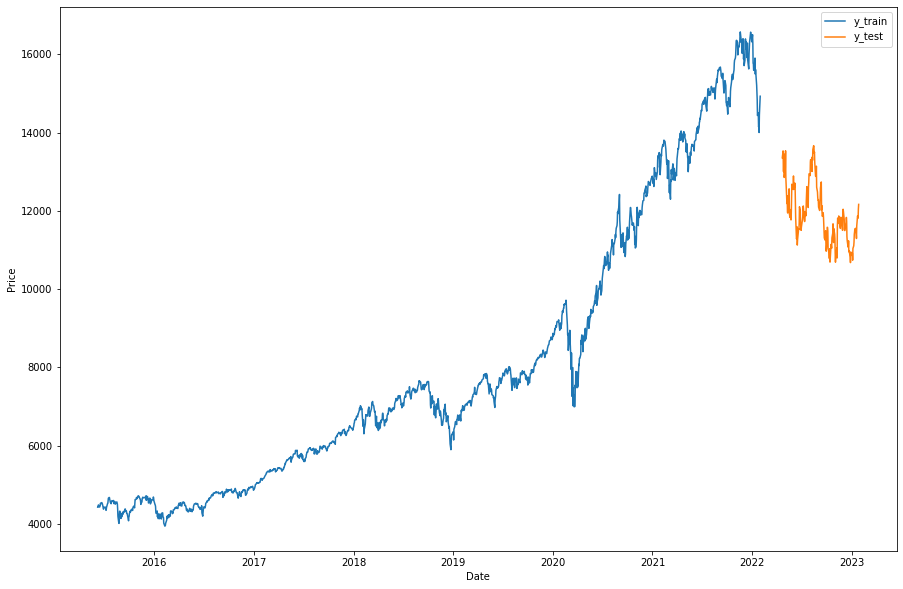

In [185]:
plot_prices(y_train,y_test)

In [187]:
print("X_train",X_train.shape)
print("y_train",y_train.shape)
print("---")
print("X_test",X_test.shape)
print("y_test",y_test.shape)

X_train torch.Size([1679, 36])
y_train torch.Size([1679])
---
X_test torch.Size([193, 36])
y_test torch.Size([193])


# 6. Develop model

## 6.1 PyTorch Model #1

In [188]:
EPOCH = 100
BATCH_SIZE = 4
LR = 0.0001
N_FEATURES = X_train.shape[1]

In [189]:
class Model1(nn.Module):
    def __init__(self):
        super(Model1, self).__init__()
        self.fc1 = nn.Linear(N_FEATURES, 512)
        self.fc2 = nn.Linear(512, 64)
        self.fc3 = nn.Linear(64, 128)
        self.fc4 = nn.Linear(128, 1)
        self.dropout = nn.Dropout(p=0.4)
        # batch normalization
        self.batch1 = nn.BatchNorm1d(512)
        self.batch2 = nn.BatchNorm1d(64)
        self.batch3 = nn.BatchNorm1d(128)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

net = Model1().to(device)

optimizer = torch.optim.Adam(net.parameters(), lr=LR/256, weight_decay=1e-3)
loss_func = nn.MSELoss()

for epoch in range(EPOCH):
    for i in range(0, len(X_train), BATCH_SIZE):
        batch_x = X_train[i:i+BATCH_SIZE].float().to(device)
        batch_y = y_train[i:i+BATCH_SIZE].float().to(device)
        
        optimizer.zero_grad()
        outputs = net(batch_x)
        loss = loss_func(outputs, batch_y)
        loss.backward()
        optimizer.step()
        
    print(f"EPOCH: {epoch} | Loss: {loss.item()}")

EPOCH: 0 | Loss: 202543024.0
EPOCH: 1 | Loss: 198947904.0
EPOCH: 2 | Loss: 195727552.0
EPOCH: 3 | Loss: 192607872.0
EPOCH: 4 | Loss: 189603648.0
EPOCH: 5 | Loss: 186826448.0
EPOCH: 6 | Loss: 184275488.0
EPOCH: 7 | Loss: 181768992.0
EPOCH: 8 | Loss: 179225744.0
EPOCH: 9 | Loss: 176622224.0
EPOCH: 10 | Loss: 173906320.0
EPOCH: 11 | Loss: 171222928.0
EPOCH: 12 | Loss: 168544944.0
EPOCH: 13 | Loss: 165858000.0
EPOCH: 14 | Loss: 163138896.0
EPOCH: 15 | Loss: 160376896.0
EPOCH: 16 | Loss: 157500720.0
EPOCH: 17 | Loss: 154606736.0
EPOCH: 18 | Loss: 151759168.0
EPOCH: 19 | Loss: 148904832.0
EPOCH: 20 | Loss: 146020272.0
EPOCH: 21 | Loss: 143106704.0
EPOCH: 22 | Loss: 140172864.0
EPOCH: 23 | Loss: 137216464.0
EPOCH: 24 | Loss: 134248112.0
EPOCH: 25 | Loss: 131253928.0
EPOCH: 26 | Loss: 128235096.0
EPOCH: 27 | Loss: 125236336.0
EPOCH: 28 | Loss: 122212648.0
EPOCH: 29 | Loss: 119162424.0
EPOCH: 30 | Loss: 116058184.0
EPOCH: 31 | Loss: 112942464.0
EPOCH: 32 | Loss: 109808808.0
EPOCH: 33 | Loss: 10

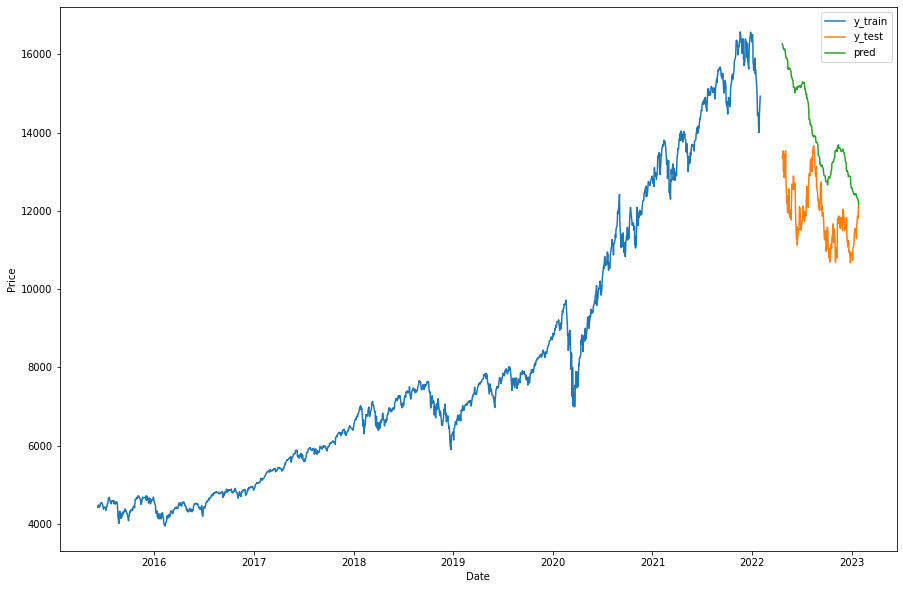

In [190]:
y_pred = net(X_test.float().to(device)).cpu().detach().numpy()
plot_prices(y_train, y_test, y_pred)

## 6.2 PyTorch Model #2

- We used MinMaxScaler
- We used the Adam optimizer
- We used the MSE loss function
- We used the ReLU activation function

In [191]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# fit scaler on data
scaler.fit(X_train)

# transform data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# convert to torch tensor
X_train = torch.from_numpy(X_train).float()
X_test = torch.from_numpy(X_test).float()

In [192]:
class Model2(nn.Module):
    def __init__(self, input_size, num_classes):
        super(Model2, self).__init__()
        self.fc1 = nn.Linear(input_size, 2048)
        self.fc2 = nn.Linear(2048, 1024)
        self.fc3 = nn.Linear(1024, 128)
        self.fc4 = nn.Linear(128, 64)
        self.fc5 = nn.Linear(64, 8)
        self.fc6 = nn.Linear(8, num_classes)
        self.dropout1 = nn.Dropout(p=0.025)
        self.dropout2 = nn.Dropout(p=0.0025)

    def forward(self, x):
        #batch
        x = F.relu(self.fc1(x))
        x = self.dropout1(x)
        x = F.relu(self.fc2(x))
        x = self.dropout2(x)
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        x = F.relu(self.fc5(x))
        x = self.fc6(x)
        return x

modelDNN = Model2(N_FEATURES, 1)
modelDNN.to(device)

optimizer = torch.optim.Adam(modelDNN.parameters(), lr=LR/10, weight_decay=1e-3)
criterion = nn.MSELoss()

for epoch in range(250):
    for i in range(0, len(X_train), BATCH_SIZE*4):
        batch_x = X_train[i:i+BATCH_SIZE*4].float().to(device)
        batch_y = y_train[i:i+BATCH_SIZE*4].float().to(device)
        
        optimizer.zero_grad()
        outputs = modelDNN(batch_x)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        
    print(f"EPOCH: {epoch} | Loss: {loss.item()}")

EPOCH: 0 | Loss: 223851600.0
EPOCH: 1 | Loss: 223837008.0
EPOCH: 2 | Loss: 223793360.0
EPOCH: 3 | Loss: 223683936.0
EPOCH: 4 | Loss: 223448464.0
EPOCH: 5 | Loss: 222999536.0
EPOCH: 6 | Loss: 222230656.0
EPOCH: 7 | Loss: 221006592.0
EPOCH: 8 | Loss: 219172336.0
EPOCH: 9 | Loss: 216535984.0
EPOCH: 10 | Loss: 212969648.0
EPOCH: 11 | Loss: 208177328.0
EPOCH: 12 | Loss: 202071088.0
EPOCH: 13 | Loss: 194444048.0
EPOCH: 14 | Loss: 185451008.0
EPOCH: 15 | Loss: 174583072.0
EPOCH: 16 | Loss: 162572752.0
EPOCH: 17 | Loss: 148925728.0
EPOCH: 18 | Loss: 134477872.0
EPOCH: 19 | Loss: 119522584.0
EPOCH: 20 | Loss: 104466736.0
EPOCH: 21 | Loss: 89765152.0
EPOCH: 22 | Loss: 75782448.0
EPOCH: 23 | Loss: 63415028.0
EPOCH: 24 | Loss: 52513724.0
EPOCH: 25 | Loss: 43719784.0
EPOCH: 26 | Loss: 35843124.0
EPOCH: 27 | Loss: 30464200.0
EPOCH: 28 | Loss: 25757288.0
EPOCH: 29 | Loss: 22616402.0
EPOCH: 30 | Loss: 20037434.0
EPOCH: 31 | Loss: 18005854.0
EPOCH: 32 | Loss: 16554717.0
EPOCH: 33 | Loss: 15571669.0
EPO

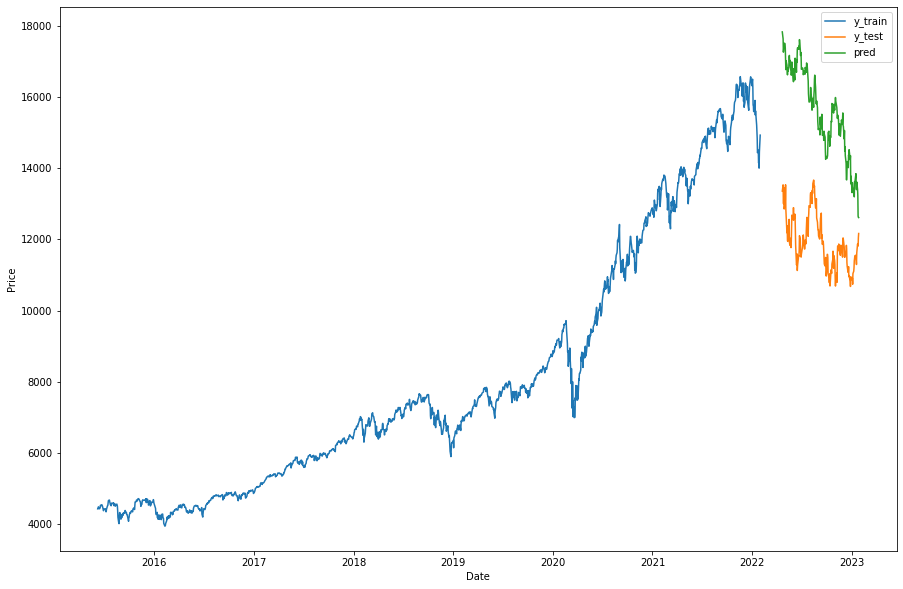

In [193]:
#plot
y_pred = modelDNN(X_test.float().to(device)).cpu().detach().numpy()
plot_prices(y_train, y_test, y_pred)

## 6.3 PyTorch Model #3

___________________________
- We have used Dense Linear as our model method.
- We have used MSE as our loss function.
- We have used Adam as our optimizer.
- We have used 125 epochs as our training epochs.
- We have used 0.00001 as our learning rate.
- We have used EPS of 1e-10

In [194]:
class Model3(nn.Module):
    def __init__(self):
        super(Model3, self).__init__()
        self.fc1 = nn.Linear(N_FEATURES, 2048)
        self.fc2 = nn.Linear(2048, 1024)
        self.fc3 = nn.Linear(1024, 128)
        self.fc4 = nn.Linear(128, 64)
        self.fc5 = nn.Linear(64, 128)
        self.fc6 = nn.Linear(128, 512)
        self.fc7 = nn.Linear(512, 64)
        self.fc8 = nn.Linear(64, 8)
        self.fc9 = nn.Linear(8, 1)

        self.dropout1 = nn.Dropout(p=0.01)
        self.dropout2 = nn.Dropout(p=0.001)
        self.dropout3 = nn.Dropout(p=0.0005)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.dropout1(x)
        x = F.relu(self.fc2(x))
        x = self.dropout1(x)
        x = F.relu(self.fc3(x))
        x = self.dropout2(x)
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = self.dropout3(x)
        x = F.relu(self.fc6(x))
        x = self.dropout3(x)
        x = F.relu(self.fc7(x))
        x = F.relu(self.fc8(x))
        x = self.fc9(x)
        return x

net = Model3().to(device)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(
    net.parameters(),
    lr=LR/10,
    weight_decay=1e-3,
    eps=1e-10
)

for epoch in range(125):
    for i in range(0, len(X_train), BATCH_SIZE*10):
        batch_x = X_train[i:i+BATCH_SIZE*10].float().to(device)
        batch_y = y_train[i:i+BATCH_SIZE*10].float().to(device)

        optimizer.zero_grad()
        outputs = net(batch_x)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()

    print(f"EPOCH: {epoch} | Loss: {loss.item()}")

EPOCH: 0 | Loss: 246410976.0
EPOCH: 1 | Loss: 246410464.0
EPOCH: 2 | Loss: 246410064.0
EPOCH: 3 | Loss: 246409504.0
EPOCH: 4 | Loss: 246408560.0
EPOCH: 5 | Loss: 246406064.0
EPOCH: 6 | Loss: 246398400.0
EPOCH: 7 | Loss: 246381872.0
EPOCH: 8 | Loss: 246348976.0
EPOCH: 9 | Loss: 246287200.0
EPOCH: 10 | Loss: 246176800.0
EPOCH: 11 | Loss: 245981760.0
EPOCH: 12 | Loss: 245651712.0
EPOCH: 13 | Loss: 245106368.0
EPOCH: 14 | Loss: 244238608.0
EPOCH: 15 | Loss: 242882784.0
EPOCH: 16 | Loss: 240818224.0
EPOCH: 17 | Loss: 237803648.0
EPOCH: 18 | Loss: 233426528.0
EPOCH: 19 | Loss: 227280416.0
EPOCH: 20 | Loss: 218960976.0
EPOCH: 21 | Loss: 207950224.0
EPOCH: 22 | Loss: 193925040.0
EPOCH: 23 | Loss: 176872128.0
EPOCH: 24 | Loss: 156912832.0
EPOCH: 25 | Loss: 135309632.0
EPOCH: 26 | Loss: 113069816.0
EPOCH: 27 | Loss: 92677960.0
EPOCH: 28 | Loss: 75041832.0
EPOCH: 29 | Loss: 61415344.0
EPOCH: 30 | Loss: 51756176.0
EPOCH: 31 | Loss: 45524708.0
EPOCH: 32 | Loss: 41196456.0
EPOCH: 33 | Loss: 38676212

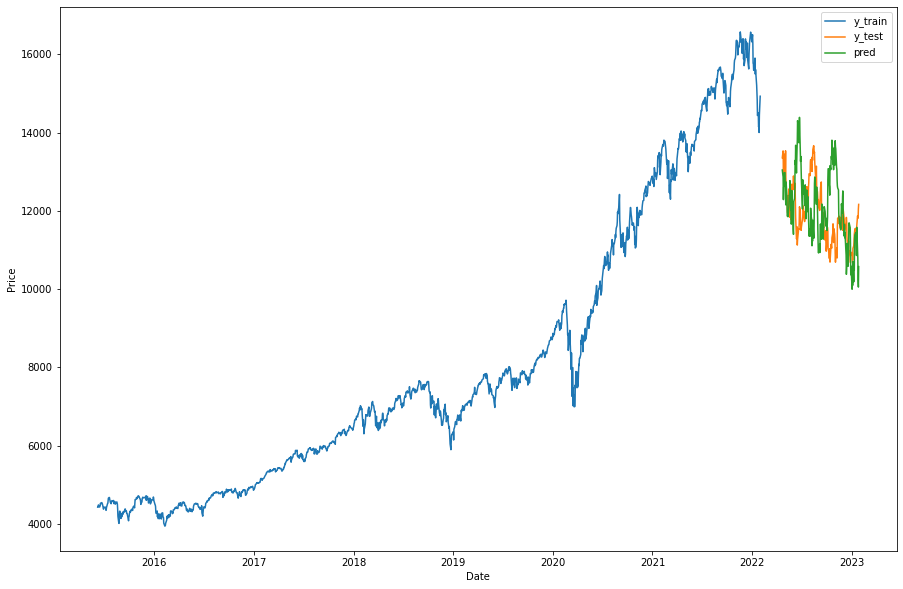

In [195]:
y_pred = net(X_test.float().to(device)).cpu().detach().numpy()
plot_prices(y_train, y_test, y_pred)

## 6.4 PyTorch Model #4

___________________________
- We have used Dense Linear as our model method.
- We have used MSE as our loss function.
- We have used Adam as our optimizer.
- We have used 125 epochs as our training epochs.
- We have used 0.00001 as our learning rate.
- We have used 0.0001 as our weight decay.
- We have used 3 Dropout values they have been incorporated by reducing fashion for less dense layers

- We have used EPS of 1e-10

In [196]:
class Model4(nn.Module):
    def __init__(self):
        super(Model4, self).__init__()
        self.fc1 = nn.Linear(N_FEATURES, 4096)
        self.fc2 = nn.Linear(4096, 1024)
        self.fc3 = nn.Linear(1024, 128)
        self.fc4 = nn.Linear(128, 64)
        self.fc5 = nn.Linear(64, 512)
        self.fc6 = nn.Linear(512, 64)
        self.fc7 = nn.Linear(64, 8)
        self.fc8 = nn.Linear(8, 1)

        self.dropout1 = nn.Dropout(p=0.01)
        self.dropout2 = nn.Dropout(p=0.001)
        self.dropout3 = nn.Dropout(p=0.0005)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.dropout1(x)
        x = F.relu(self.fc2(x))
        x = self.dropout1(x)
        x = F.relu(self.fc3(x))
        x = self.dropout2(x)
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = self.dropout3(x)
        x = F.relu(self.fc6(x))
        x = self.dropout3(x)
        x = F.relu(self.fc7(x))
        x = self.fc8(x)
        return x

net = Model4().to(device)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(
    net.parameters(),
    lr=LR/10,
    weight_decay=1e-3,
    eps=1e-10
)

for epoch in range(125):
    for i in range(0, len(X_train), BATCH_SIZE*10):
        batch_x = X_train[i:i+BATCH_SIZE*10].float().to(device)
        batch_y = y_train[i:i+BATCH_SIZE*10].float().to(device)

        optimizer.zero_grad()
        outputs = net(batch_x)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()

    print(f"EPOCH: {epoch} | Loss: {loss.item()}")

EPOCH: 0 | Loss: 246421936.0
EPOCH: 1 | Loss: 246419952.0
EPOCH: 2 | Loss: 246414208.0
EPOCH: 3 | Loss: 246401152.0
EPOCH: 4 | Loss: 246374432.0
EPOCH: 5 | Loss: 246321824.0
EPOCH: 6 | Loss: 246225200.0
EPOCH: 7 | Loss: 246055232.0
EPOCH: 8 | Loss: 245767792.0
EPOCH: 9 | Loss: 245309232.0
EPOCH: 10 | Loss: 244592384.0
EPOCH: 11 | Loss: 243480384.0
EPOCH: 12 | Loss: 241829968.0
EPOCH: 13 | Loss: 239445504.0
EPOCH: 14 | Loss: 236043968.0
EPOCH: 15 | Loss: 231388016.0
EPOCH: 16 | Loss: 225084784.0
EPOCH: 17 | Loss: 216812272.0
EPOCH: 18 | Loss: 206448144.0
EPOCH: 19 | Loss: 193549280.0
EPOCH: 20 | Loss: 178210272.0
EPOCH: 21 | Loss: 160606416.0
EPOCH: 22 | Loss: 141419648.0
EPOCH: 23 | Loss: 121586392.0
EPOCH: 24 | Loss: 102340568.0
EPOCH: 25 | Loss: 85380640.0
EPOCH: 26 | Loss: 71059744.0
EPOCH: 27 | Loss: 59885016.0
EPOCH: 28 | Loss: 51479340.0
EPOCH: 29 | Loss: 45743700.0
EPOCH: 30 | Loss: 41918348.0
EPOCH: 31 | Loss: 38871484.0
EPOCH: 32 | Loss: 36861152.0
EPOCH: 33 | Loss: 35450820.0

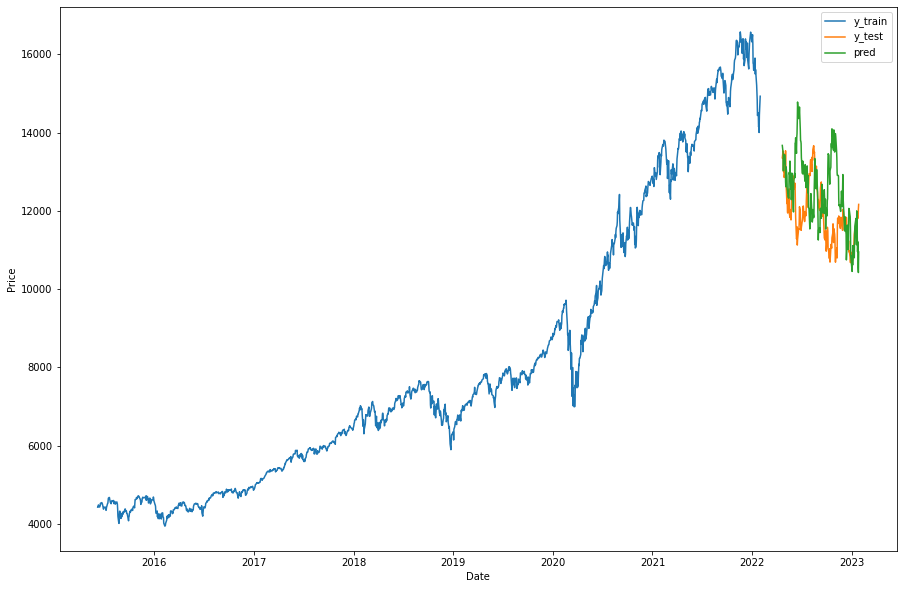

In [197]:
y_pred = net(X_test.float().to(device)).cpu().detach().numpy()
plot_prices(y_train, y_test, y_pred)

# 7. Conclusion

## 7.1 The Best Model

**Model 4** was deemed the best due to its utilization of a high number of neurons. The inclusion of a buffer zone effectively eliminated any potential data leaks, which often result in models that are overly optimistic and therefore useless for practical applications and production use.

We attempted to forecast 55 days in advance. The 55-day interval was selected to surpass the maximum limit of 50 days of the technical analysis indicators we utilized.